## 회귀 모델 (Regression Models)


### 모델별 성능 확인을 위한 함수

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
from IPython.display import Image

np.set_printoptions(suppress=True, precision=3)

my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
    
def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

### 보스턴 집 값 데이터

**데이터 로드 (load_boston)**

In [2]:
import pandas as pd
from sklearn.datasets import load_boston

data = load_boston()

data['data']에는 X 데이터, data['feature_names']에는 컬럼 명입니다.

In [3]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


target 데이터도 Column 에 추가 합니다.

In [5]:
df['target'] = data['target']

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**컬럼 소개**

속성 수 : 13

* **CRIM**: 범죄율
* **ZN**: 25,000 평방 피트 당 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 면적 비율
* **CHAS**: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* **NOX**: 산화 질소 농도 (천만 분의 1)
* **RM**:주거 당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가 소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시 별 학생-교사 비율
* **B**: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
* **LSTAT**: 인구의 낮은 지위
* **target**: 자가 주택의 중앙값 (1,000 달러 단위)

학습(train) / 테스트(test) 용 데이터를 분할 합니다.

In [14]:
from sklearn.model_selection import train_test_split

SEED=30

In [32]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('target', 1), df['target'], random_state = SEED)

C:\Users\user\AppData\Local\Temp/ipykernel_7948/3099283986.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_train, x_test, y_train, y_test = train_test_split(df.drop('target', 1), df['target'], random_state = SEED)


In [33]:
x_train.shape , t_test.shape

((379, 13), (127,))

## LinearRegression

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression(n_jobs = -1)

In [36]:
model

LinearRegression(n_jobs=-1)

* n_jobs: CPU코어의 사용

In [37]:
model.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [38]:
pred = model.predict(x_test)

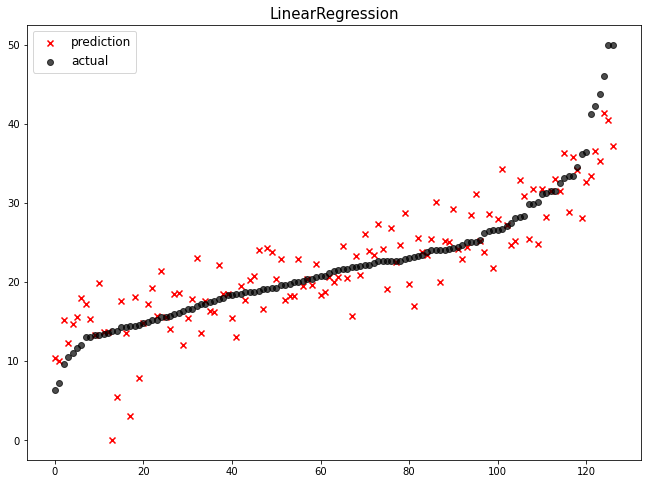

              model        mse
0  LinearRegression  16.485165


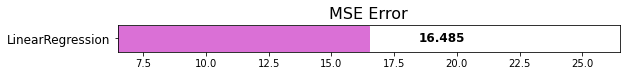

In [41]:
mse_eval('LinearRegression', pred, y_test)

'''

대부분은 다 잘 했지만 가장 앞와 끝은 제대로 되지 않아서 오차값이 높아졌다. 

특히 x축 20쪽을 보면제대로 정렬이 되지 않았고, 120쪽 위에는 예측값이 없다.

이러한 것들은 패널티가 크다.

즉, 2차함수로 생각해보면 중심에서 멀어지면 멀어질수록 패널티가 크다고 할 수 있는데,
위에서 언급한 패널티가 큰 곳들은 2차함수 중심에서 멀리있는 곳이라고 할 수 있다.

'''

'''

학습의 주체 : w, b

regularization을 한 번 거치면 그래프가 좀 더 부드러워진다.
즉, 너무 높은 값은 깎아내리고, 너무 낮은 값은 끌어올린다.
overfitting을 줄이는 것의 연속이다.

다중회귀, 다항회귀
y = w1x1 + w2x2 + ..... + b
w1은 값이 엄청 큼
w3는 거의 0에 수렴됨

값의 간격이 너무 크면은 시각화해서 보게되면 심박수 그래프처럼 높고 낮게 뛴다.
이를 부드럽게 하기 위해서 regularization을 통해 data의 variety(다양성)을 낮춰줘야 overfitting이 나지 않는다. 이를 통해 성능이 올라 갈 것이다.

overfitting과 성능은 반비례(Trade off)관계이다.

데이터의 다양성을 낮추기 위해서는 규제가 필요하다.   
이는 특정한 컬럼에만 적용하는 것이 아니고, 전체적인 컬럼에 규제하는 것이다.

w값이 한쪽으로 과도하게 쏠리는 것을 방지하는 것이 규제, 즉 Regularization이다.


규제 적용 방법 : cost함수 적용(MSE)


L1규제 : MSE + a*시그마 abs(w)

L2규제 : MSE + a*시그마(w)**2

위에서의 a는 규제 강도이다. 규제를 얼마나 강하게 줄 것인지를 수치로 나타낸다.
높으면 강한 규제이고, 낮으면 약한 규제이다.



'''

'''

선형 회귀 모델은 규제를 하나도 가하지 않은 것이다.

선형 회귀 모델에 L1규제를 적용한 것이 Lasso이다. 규제강도 * 시그마abs(w)
선형 회귀 모델에 L2규제를 적용한 것이 Ridge이다. 규제강도 * 시그마(w) **2

간단하게 외우기 

L1은 왼쪽이니까 L(left)asso

L2는 오른쪽이니까 R(Right)idge

'''

## 규제 (Regularization)

학습이 과대적합 되는 것을 방지하고자 일종의 **penalty**를 부여하는 것  

**L2 규제 (L2 Regularization)**

* 각 가중치 제곱의 합에 규제 강도(Regularization Strength) λ를 곱한다. 
* λ를 크게 하면 가중치가 더 많이 감소되고(규제를 중요시함), λ를 작게 하면 가중치가 증가한다(규제를 중요시하지 않음).

**L1 규제 (L1 Regularization)**

* 가중치의 제곱의 합이 아닌 **가중치의 절대값**을 더한 값에 규제 강도(Regularization Strength) λ를 곱하여 오차에 더한다. 
* 어떤 가중치(w)는 실제로 0이 된다. 즉, 모델에서 완전히 제외되는 특성이 생기는 것이다. 


**L2 규제가 L1 규제에 비해 더 안정적이라 일반적으로는 L2규제가 더 많이 사용된다**

### Ridge (L2 Regularization)

- L2 규제 계수를 적용합니다. 
- 선형회귀에 가중치 (weight)들의 제곱합에 대한 최소화를 추가합니다.

**주요 hyperparameter**
- `alpha`: 규제 계수

**수식**

$Error=MSE+αw^2$ 

In [42]:
from sklearn.linear_model import Ridge

**규제 계수(alpha)**를 정의합니다.

In [44]:
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

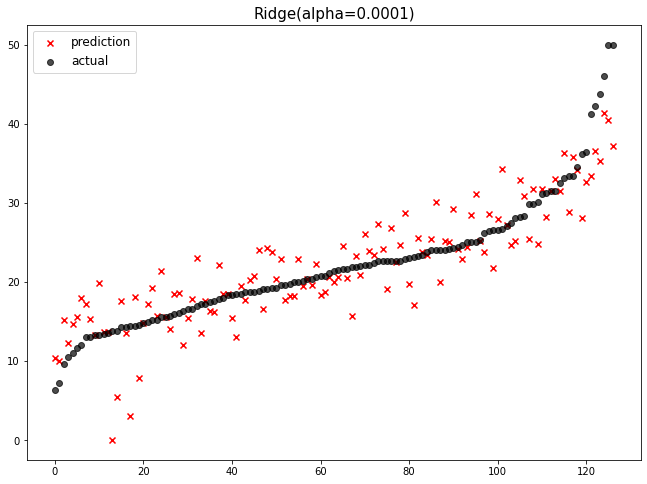

                 model        mse
0     Ridge(alpha=100)  18.018382
1      Ridge(alpha=10)  17.068408
2       Ridge(alpha=1)  16.652412
3     LinearRegression  16.485165
4  Ridge(alpha=0.0001)  16.485151
5   Ridge(alpha=0.001)  16.485020
6    Ridge(alpha=0.01)  16.483801
7     Ridge(alpha=0.1)  16.479483


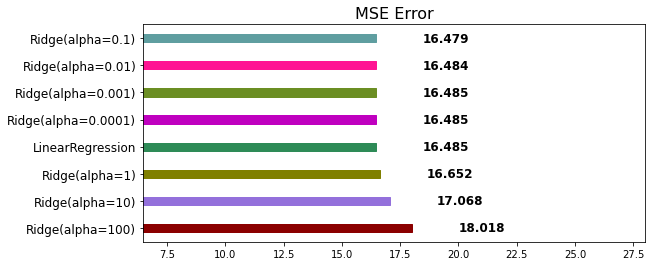

In [46]:
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    add_model('Ridge(alpha={})'.format(alpha), pred, y_test)
plot_all()

In [48]:
'''선형회귀모델은 규제강도를 아예 주지 않은 것이므로, 0에 가까울수록 기존 선형 회귀모델과의 
에러 수치는 같아진다.'''

'선형회귀모델은 규제강도를 아예 주지 않은 것이므로, 0에 가까울수록 기존 선형 회귀모델과의 \n에러 수치는 같아진다.'

coef_는 **feature의 가중치**를 보여줍니다.

가중치(weight)를 토대로 회귀 예측시 어떤 feature가 주요하게 영향을 미쳤는지 보여 줍니다.

In [50]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [49]:
'''
coef_값이 음으로 높을 경우 아파트를 예로 들면 아파트 값이 떨어지는 것이고,
coef_값이 양으로 높을 경우 아파트 값이 올라가는 것이다.
'''

ridge.coef_

array([ -0.115,   0.04 ,  -0.003,   3.487, -18.012,   3.729,   0.005,
        -1.529,   0.325,  -0.013,  -0.957,   0.006,  -0.557])

**DataFrame**으로 feature별 가중치를 시각화 합니다.

In [51]:
list(zip(x_train.columns, ridge.coef_))

[('CRIM', -0.11473573559118938),
 ('ZN', 0.04045244824086786),
 ('INDUS', -0.0028785170940756953),
 ('CHAS', 3.486691649056479),
 ('NOX', -18.012494293774203),
 ('RM', 3.7289172052704527),
 ('AGE', 0.004546036313653151),
 ('DIS', -1.5293992458368861),
 ('RAD', 0.32479345169343016),
 ('TAX', -0.013133583308927818),
 ('PTRATIO', -0.9572456861802442),
 ('B', 0.006368762657410718),
 ('LSTAT', -0.5573495745859701)]

In [57]:
'''

밑의 세 개는 중요도가 매우 낮아서 빼고 진행하는 것이 성능에 큰 도움을 준다.

'''

fi = pd.DataFrame(list(zip(x_train.columns, abs(ridge.coef_))))
fi.columns = ['features', 'importances']
fi.sort_values('importances', ascending = False)

,features,importances
4,NOX,18.012494
5,RM,3.728917
3,CHAS,3.486692
7,DIS,1.529399
10,PTRATIO,0.957246
12,LSTAT,0.557350
8,RAD,0.324793
0,CRIM,0.114736
1,ZN,0.040452
9,TAX,0.013134


In [58]:
def plot_coef(columns, coef):
    # 데이터프레임 만드는 코드
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    #시각화 코드
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

이번에는, **alpha 값에 따른 coef 의 차이**를 확인해 봅시다

In [59]:
ridge_100 = Ridge(alpha=100)
ridge_100.fit(x_train, y_train)
ridge_pred_100 = ridge_100.predict(x_test)

ridge_001 = Ridge(alpha=0.001)
ridge_001.fit(x_train, y_train)
ridge_pred_001 = ridge_001.predict(x_test)

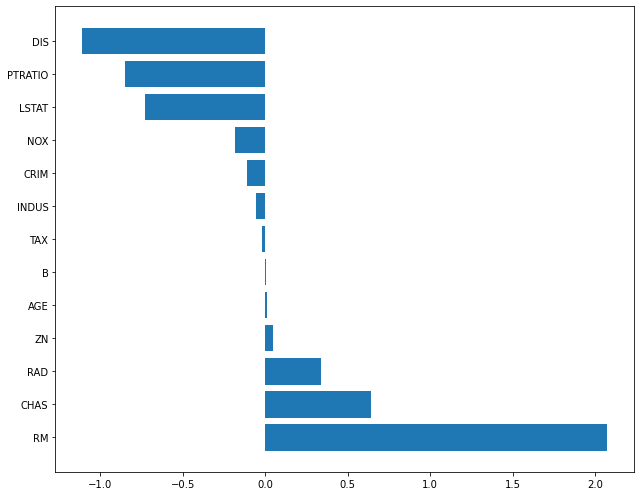

In [60]:
plot_coef(x_train.columns, ridge_100.coef_)

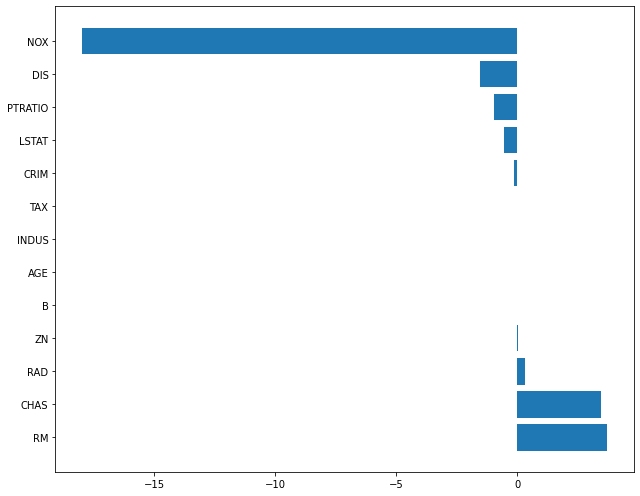

In [62]:
plot_coef(x_train.columns, ridge_001.coef_)

'''

결론 : 규제 강도에 따라서 컬럼의 가중치가 달라진다. 

'''

### Lasso (L1 Regularization)

Lasso(Least Absolute Shrinkage and Selection Operator)

- 선형 회귀에 L1 규제 계수를 적용합니다.
- 가중치(weight)의 절대 값의 합을 최소화 하는 계수를 추가 합니다.
- 불필요한 회귀 계수를 급격히 감소, 0으로 만들어 제거합니다.
- 특성(Feature) 선택에 유리합니다.

**주요 hyperparameter**
- `alpha`: L1 규제 계수

**수식**  
$Error=MSE+α|w|$

In [71]:
from sklearn.linear_model import Lasso

alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

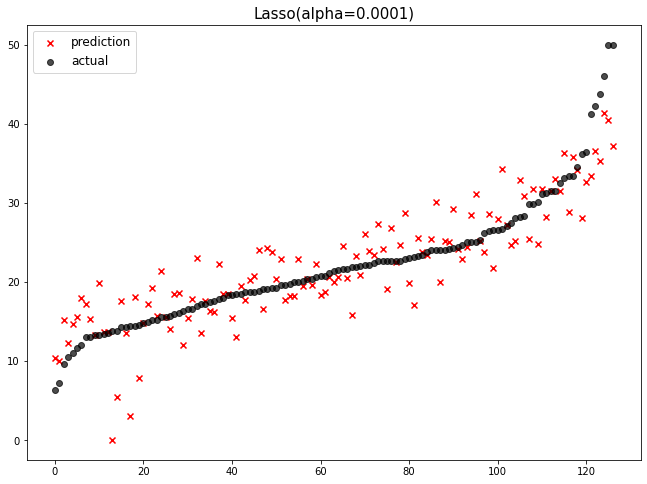

                  model        mse
0      Lasso(alpha=100)  48.725206
1       Lasso(alpha=10)  27.146245
2        Lasso(alpha=1)  19.882302
3      Ridge(alpha=100)  18.018382
4      Lasso(alpha=0.1)  17.083615
5       Ridge(alpha=10)  17.068408
6        Ridge(alpha=1)  16.652412
7      LinearRegression  16.485165
8   Ridge(alpha=0.0001)  16.485151
9    Ridge(alpha=0.001)  16.485020
10  Lasso(alpha=0.0001)  16.484261
11    Ridge(alpha=0.01)  16.483801
12     Ridge(alpha=0.1)  16.479483
13   Lasso(alpha=0.001)  16.476551
14    Lasso(alpha=0.01)  16.441822


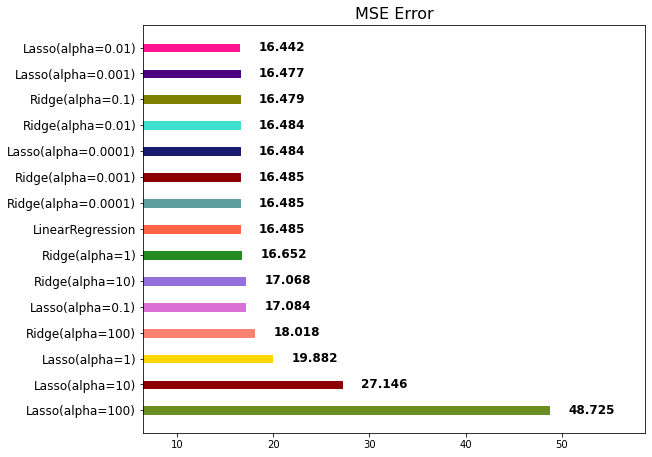

In [72]:
for alpha in alphas:
    lasso = Lasso(alpha = alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    add_model('Lasso(alpha={})'.format(alpha), pred, y_test)
plot_all()

'''

Lasso의 문제점 : 규제강도가 강해지면 말도안되는 값이 나온다.
Lasso는 극단적이다.

'''

In [73]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(x_train, y_train)
lasso_pred_001 = lasso_001.predict(x_test)

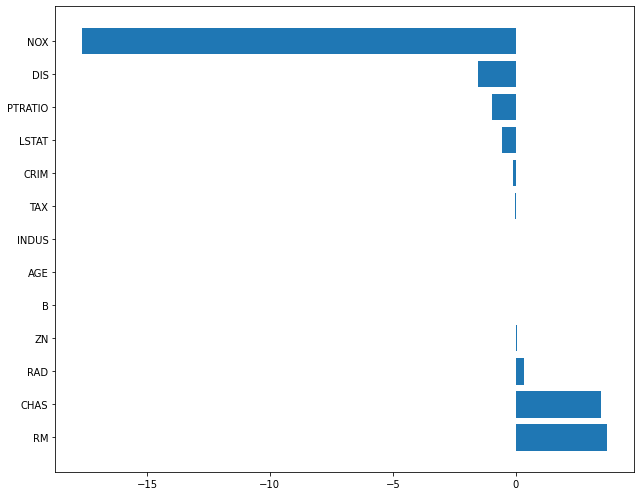

In [74]:
plot_coef(x_train.columns, lasso_001.coef_)

In [75]:
lasso_001.coef_

array([ -0.115,   0.04 ,  -0.004,   3.468, -17.66 ,   3.73 ,   0.004,
        -1.523,   0.324,  -0.013,  -0.954,   0.006,  -0.558])

Lasso 모델에 너무 큰 alpha 계수를 적용하면 **대부분의 feature들의 가중치가 0으로 수렴**합니다.

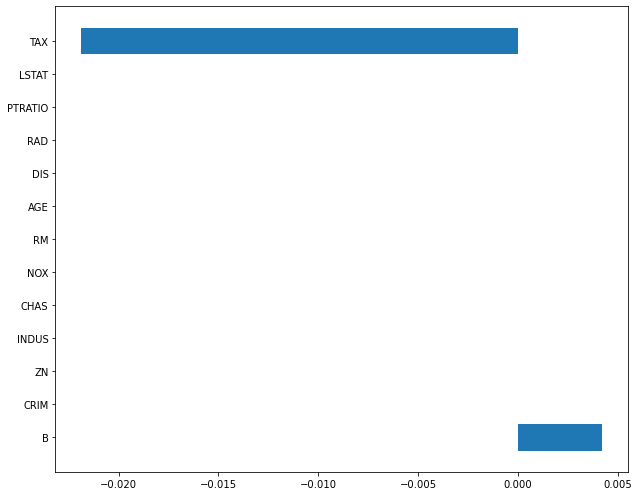

In [76]:
plot_coef(x_train.columns, lasso_100.coef_)

In [77]:
lasso_100.coef_

array([-0.   ,  0.   , -0.   ,  0.   , -0.   ,  0.   , -0.   ,  0.   ,
        0.   , -0.022, -0.   ,  0.004, -0.   ])

### ElasticNet

Elastic Net 회귀모형은 **가중치의 절대값의 합(L1)과 제곱합(L2)을 동시에** 제약 조건으로 가지는 모형입니다.

In [78]:
Image(url='https://miro.medium.com/max/1312/1*j_DDK7LbVrejTq0tfmavAA.png', width=500)

'''

ElasticNet => L1, L2규제 모두 사용하는 선형 회귀 모델
MSE + (b * L1 + (1-b) * L2)


b = l1_ratio

model = ElasticNet(alpha = 100, l1_ratio = 0.3) 
=> l1_ratio 비중이 0.3이므로 L2에 더 비중을 두는 것

b값을 가지고 줄타기를 하면서 L1, L2 규제를 섞은 하이브리드형 선형모델

'''

**주요 hyperparameter**

`alpha`: 규제 계수

`l1_ratio (default=0.5)`

- l1_ratio = 0 (L2 규제만 사용). 
- l1_ratio = 1 (L1 규제만 사용). 
- 0 < l1_ratio < 1 (L1 and L2 규제의 혼합사용)

In [81]:
from sklearn.linear_model import ElasticNet
alpha = 0.01 # 고정

ratios = [0.2, 0.5, 0.8]

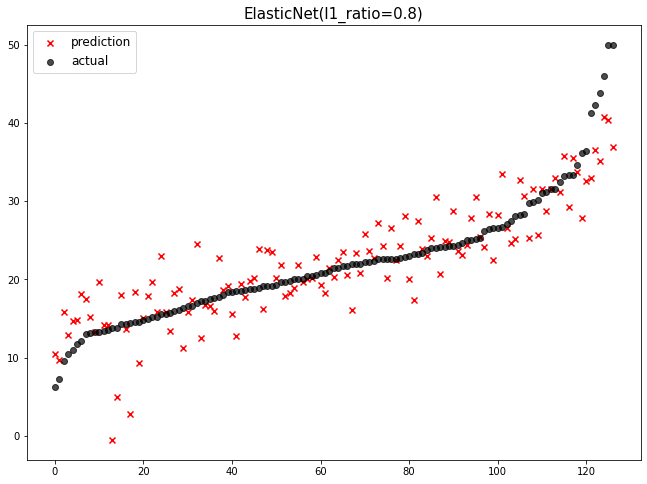

                       model        mse
0           Lasso(alpha=100)  48.725206
1            Lasso(alpha=10)  27.146245
2             Lasso(alpha=1)  19.882302
3           Ridge(alpha=100)  18.018382
4           Lasso(alpha=0.1)  17.083615
5            Ridge(alpha=10)  17.068408
6   ElasticNet(l1_ratio=0.2)  16.914638
7   ElasticNet(l1_ratio=0.5)  16.822431
8             Ridge(alpha=1)  16.652412
9   ElasticNet(l1_ratio=0.8)  16.638817
10          LinearRegression  16.485165
11       Ridge(alpha=0.0001)  16.485151
12        Ridge(alpha=0.001)  16.485020
13       Lasso(alpha=0.0001)  16.484261
14         Ridge(alpha=0.01)  16.483801
15          Ridge(alpha=0.1)  16.479483
16        Lasso(alpha=0.001)  16.476551
17         Lasso(alpha=0.01)  16.441822


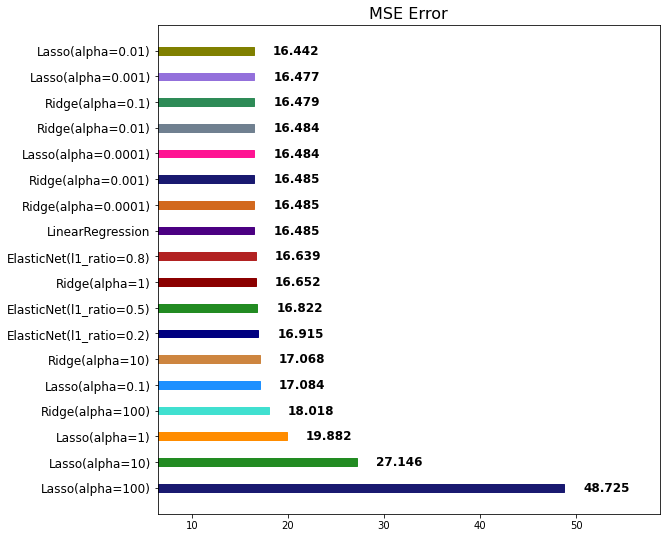

In [82]:
for ratio in ratios:   
    elasticnet = ElasticNet(alpha = alpha, l1_ratio = ratio)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    add_model('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)
plot_all()

In [83]:
elsticnet_20 = ElasticNet(alpha=5, l1_ratio=0.2) # L2
elsticnet_20.fit(x_train, y_train)
elasticnet_pred_20 = elsticnet_20.predict(x_test)

elsticnet_80 = ElasticNet(alpha=5, l1_ratio=0.8) # L1
elsticnet_80.fit(x_train, y_train)
elasticnet_pred_80 = elsticnet_80.predict(x_test)

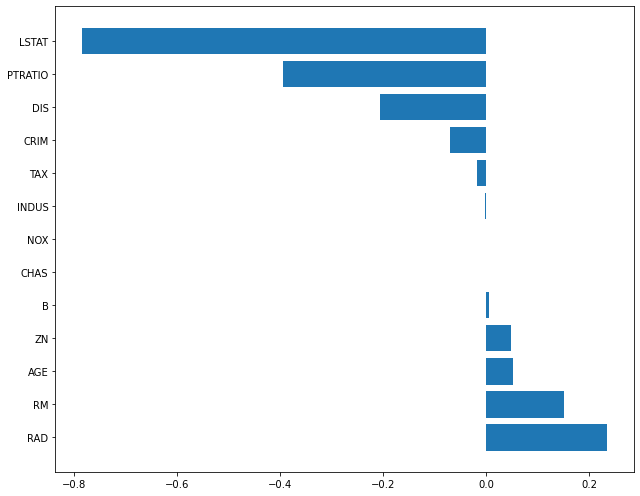

In [84]:
plot_coef(x_train.columns, elsticnet_20.coef_)

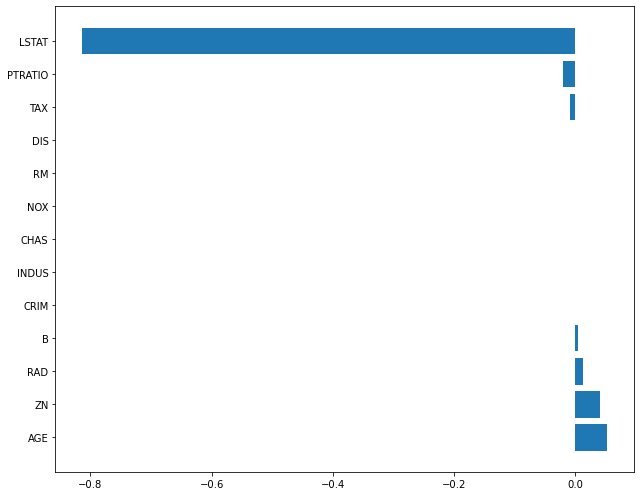

In [85]:
plot_coef(x_train.columns, elsticnet_80.coef_)

## Scaler 적용

In [87]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### MinMaxScaler (정규화)

정규화 (Normalization)도 표준화와 마찬가지로 데이터의 스케일을 조정합니다.

정규화가 표준화와 다른 가장 큰 특징은 **모든 데이터가 0 ~ 1 사이의 값**을 가집니다.

즉, 최대값은 1, 최소값은 0으로 데이터의 범위를 조정합니다.

In [60]:
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train)

min값과 max값을 0~1사이로 정규화

In [88]:
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train) 

In [89]:
round(pd.DataFrame(minmax_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.04,0.12,0.38,0.07,0.34,0.52,0.66,0.28,0.37,0.42,0.62,0.90,0.31
std,0.11,0.24,0.25,0.25,0.24,0.14,0.30,0.22,0.38,0.32,0.23,0.23,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.16,0.00,0.12,0.45,0.40,0.10,0.13,0.17,0.46,0.95,0.14
50%,0.00,0.00,0.29,0.00,0.31,0.51,0.76,0.22,0.17,0.27,0.69,0.99,0.27
75%,0.04,0.20,0.64,0.00,0.49,0.59,0.93,0.43,1.00,0.91,0.81,1.00,0.44
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### StandardScaler (표준화)

표준화는 데이터의 **평균을 0 분산 및 표준편차를 1**로 만들어 줍니다.


**표준화를 하는 이유**

- 서로 **다른 통계 데이터들을 비교하기 용이**하기 때문입니다.
- 표준화를 하면 평균은 0, 분산과 표준편차는 1로 만들어 데이터의 **분포를 단순화 시키고, 비교를 용이**하게 합니다.

In [65]:
Image(url='https://t1.daumcdn.net/cfile/tistory/999EC6335CDE8D8131', width=100)

In [90]:
std_scaler = StandardScaler()
std_scalerd =  std_scaler.fit_transform(x_train)

In [91]:
round(pd.DataFrame(std_scalerd).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.40,-0.50,-1.51,-0.27,-1.43,-3.76,-2.21,-1.28,-0.98,-1.30,-2.64,-3.88,-1.51
25%,-0.40,-0.50,-0.86,-0.27,-0.92,-0.56,-0.88,-0.82,-0.63,-0.77,-0.67,0.21,-0.80
50%,-0.38,-0.50,-0.36,-0.27,-0.14,-0.11,0.33,-0.25,-0.52,-0.46,0.31,0.38,-0.20
75%,-0.02,0.33,1.04,-0.27,0.64,0.46,0.91,0.69,1.66,1.52,0.81,0.43,0.64
max,9.03,3.66,2.45,3.68,2.76,3.41,1.13,3.31,1.66,1.79,1.63,0.43,3.41


## 파이프라인 (pipeline)

scikit-learn의 **전처리(pre-processing)용 모듈과 모델의 학습 기능을 파이프라인으로 합칠 수** 있습니다.

- 파이프라인으로 결합된 모형은 원래의 모형이 가지는 `fit`, `predict` 함수를 가집니다.
- 파이프라인에 정의된 순서에 따라 전처리 모듈이 먼저 호출되어 전처리 과정을 거친 후 모델이 학습하게 됩니다.

In [126]:
from sklearn.pipeline import make_pipeline, Min

In [128]:
pipeline = make_pipeline(
    MinMaxScaler(),
   ElasticNet(alpha = 0.1, l1_ratio = 0.1 )
)

In [129]:
pipeline.fit(x_train, y_train)
pipeline_pred = pipeline.predict(x_test)

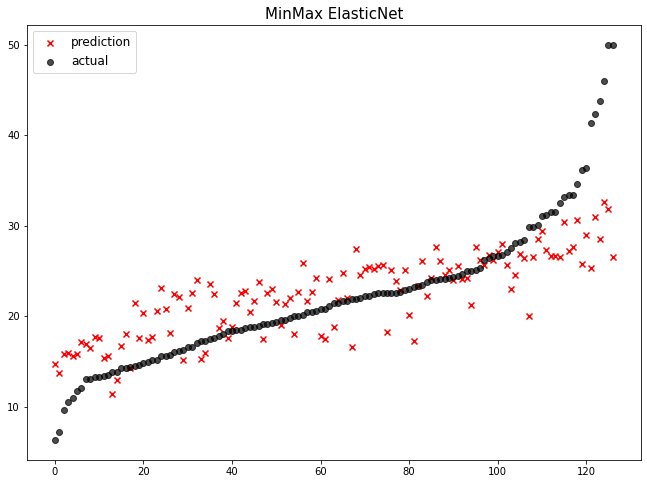

                       model        mse
0           Lasso(alpha=100)  48.725206
1          MinMax ElasticNet  27.308733
2            Lasso(alpha=10)  27.146245
3             Lasso(alpha=1)  19.882302
4           Ridge(alpha=100)  18.018382
5           Lasso(alpha=0.1)  17.083615
6            Ridge(alpha=10)  17.068408
7   ElasticNet(l1_ratio=0.2)  16.914638
8   ElasticNet(l1_ratio=0.5)  16.822431
9             Ridge(alpha=1)  16.652412
10  ElasticNet(l1_ratio=0.8)  16.638817
11          LinearRegression  16.485165
12       Ridge(alpha=0.0001)  16.485151
13        Ridge(alpha=0.001)  16.485020
14       Lasso(alpha=0.0001)  16.484261
15         Ridge(alpha=0.01)  16.483801
16          Ridge(alpha=0.1)  16.479483
17        Lasso(alpha=0.001)  16.476551
18         Lasso(alpha=0.01)  16.441822


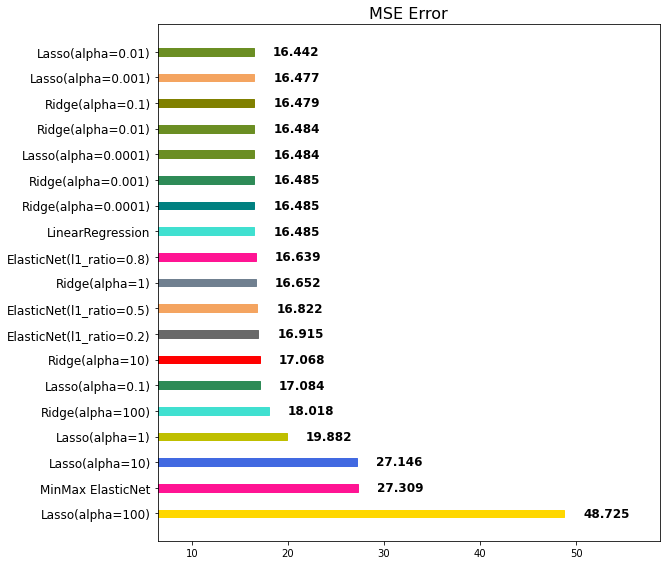

In [130]:
mse_eval('MinMax ElasticNet', pipeline_pred, y_test)

In [131]:
pipeline = make_pipeline(
    StandardScaler(),
   ElasticNet(alpha = 0.1, l1_ratio = 0.1)
)

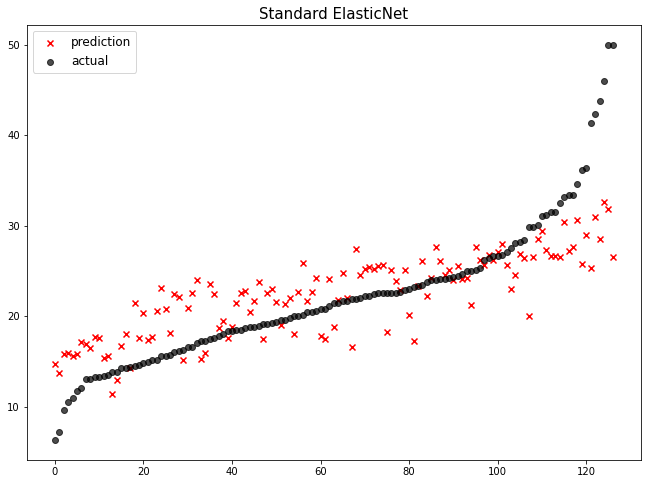

                       model        mse
0           Lasso(alpha=100)  48.725206
1          MinMax ElasticNet  27.308733
2        Standard ElasticNet  27.308733
3            Lasso(alpha=10)  27.146245
4             Lasso(alpha=1)  19.882302
5           Ridge(alpha=100)  18.018382
6           Lasso(alpha=0.1)  17.083615
7            Ridge(alpha=10)  17.068408
8   ElasticNet(l1_ratio=0.2)  16.914638
9   ElasticNet(l1_ratio=0.5)  16.822431
10            Ridge(alpha=1)  16.652412
11  ElasticNet(l1_ratio=0.8)  16.638817
12          LinearRegression  16.485165
13       Ridge(alpha=0.0001)  16.485151
14        Ridge(alpha=0.001)  16.485020
15       Lasso(alpha=0.0001)  16.484261
16         Ridge(alpha=0.01)  16.483801
17          Ridge(alpha=0.1)  16.479483
18        Lasso(alpha=0.001)  16.476551
19         Lasso(alpha=0.01)  16.441822


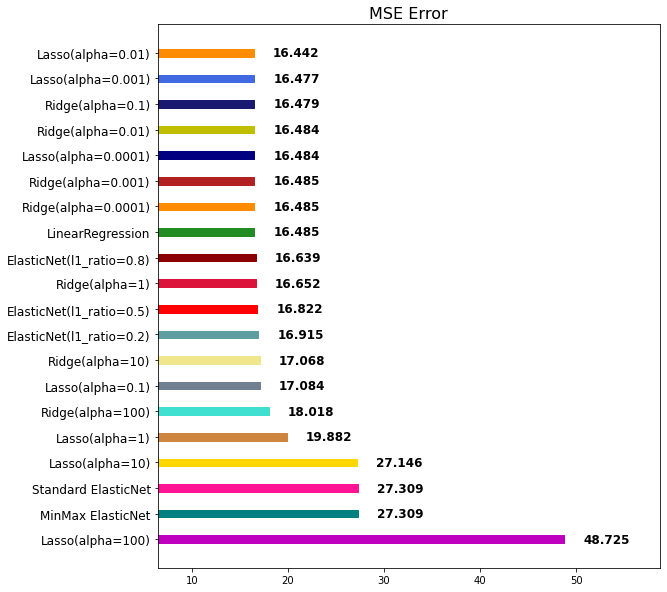

In [132]:
mse_eval('Standard ElasticNet', pipeline_pred, y_test)

### Polynomial Features

다항식의 계수간 상호작용을 통해 **새로운 feature를 생성**합니다.

예를들면, [a, b] 2개의 feature가 존재한다고 가정하고,

degree=2로 설정한다면, polynomial features 는 [1, a, b, a^2, ab, b^2] 가 됩니다.

**주의**
- `degree`를 올리면, 기하급수적으로 많은 feature 들이 생겨나며, 학습 데이터에 지나치게 과대적합 될 수 있습니다.

**주요 hyperparameter**

- `degree`: 차수
- `include_bias`: 1로 채운 컬럼 추가 여부

In [109]:
from sklearn.preprocessing import PolynomialFeatures

In [111]:
x = np.arange(5).reshape(-1, 1)
x

array([[0],
       [1],
       [2],
       [3],
       [4]])

`degree=2`, `include_bias=False` 인 경우

In [112]:
poly = PolynomialFeatures(degree = 2, include_bias=False) # degree 몇제곱할건지
x_poly = poly.fit_transform(x)
x_poly

array([[ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  4.],
       [ 3.,  9.],
       [ 4., 16.]])

`degree=2`, `include_bias=True` 인 경우

In [114]:
poly = PolynomialFeatures(degree = 2, include_bias=True) # degree 몇제곱할건지
# include_bias=True값은 학습에 도움이 되지 않는다. 따라서 그냥 False를 해주는 것이 낫다.
x_poly = poly.fit_transform(x)
x_poly

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.]])

`degree=3`, `include_bias=True` 인 경우

In [116]:
poly = PolynomialFeatures(degree = 3, include_bias= False)
x_poly = poly.fit_transform(x)
x_poly

array([[ 0.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

보스톤 집 값 데이터의 features에 `PolynomialFeatures`를 적용합니다.

In [117]:
poly = PolynomialFeatures(degree = 2, include_bias= False)

In [118]:
poly_features = poly.fit_transform(x_train)

In [119]:
x_train.shape

(379, 13)

In [120]:
poly_features.shape

(379, 104)

PolynomialFeature로 증폭시킨 컬럼을 다시 전처리 과정을 거치는 것은 너무 비효율적인 작업이다.  

`PolynomialFeature`도 파이프라인(pipeline)을 활용하여 전처리 해준다면, 손쉽게 구현 및 적용이 가능합니다.

In [144]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree = 2, include_bias=False),
    ElasticNet(alpha = 0.1, l1_ratio=0.2)
)

In [145]:
poly_pipeline.fit(x_train, y_train)
poly_pred = poly_pipeline.predict(x_test)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1748.274467307759, tolerance: 3.4587142691292874
  model = cd_fast.enet_coordinate_descent(


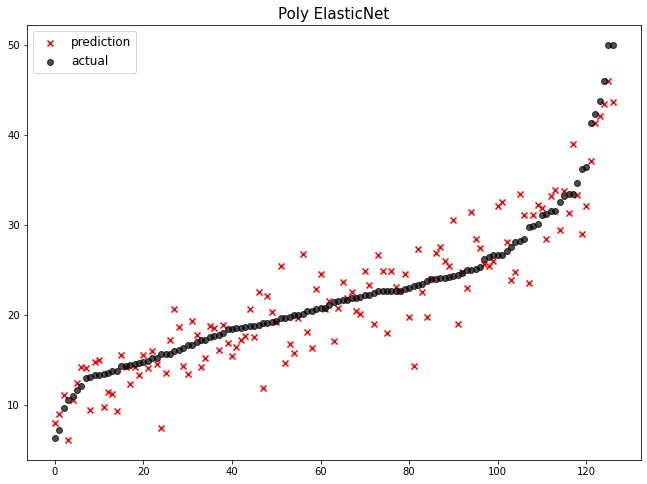

                       model        mse
0           Lasso(alpha=100)  48.725206
1          MinMax ElasticNet  27.308733
2        Standard ElasticNet  27.308733
3            Lasso(alpha=10)  27.146245
4             Lasso(alpha=1)  19.882302
5           Ridge(alpha=100)  18.018382
6           Lasso(alpha=0.1)  17.083615
7            Ridge(alpha=10)  17.068408
8   ElasticNet(l1_ratio=0.2)  16.914638
9   ElasticNet(l1_ratio=0.5)  16.822431
10            Ridge(alpha=1)  16.652412
11  ElasticNet(l1_ratio=0.8)  16.638817
12          LinearRegression  16.485165
13       Ridge(alpha=0.0001)  16.485151
14        Ridge(alpha=0.001)  16.485020
15       Lasso(alpha=0.0001)  16.484261
16         Ridge(alpha=0.01)  16.483801
17          Ridge(alpha=0.1)  16.479483
18        Lasso(alpha=0.001)  16.476551
19         Lasso(alpha=0.01)  16.441822
20           Poly ElasticNet  10.147479
21  Poly standard ElasticNet   8.264002


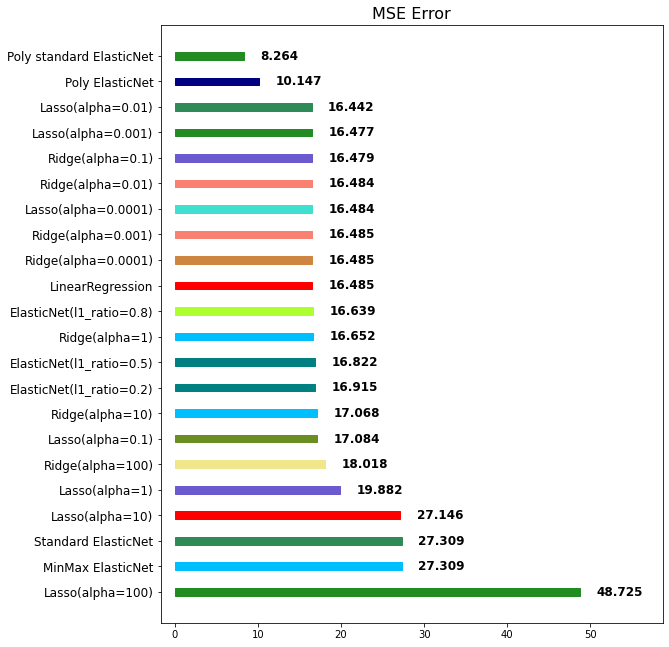

In [146]:
mse_eval('Poly ElasticNet', poly_pred, y_test)

In [147]:
poly_pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree = 2, include_bias=False),
    ElasticNet(alpha = 0.1, l1_ratio=0.2)
)

In [148]:
poly_pipeline.fit(x_train, y_train)
poly_pred = poly_pipeline.predict(x_test)

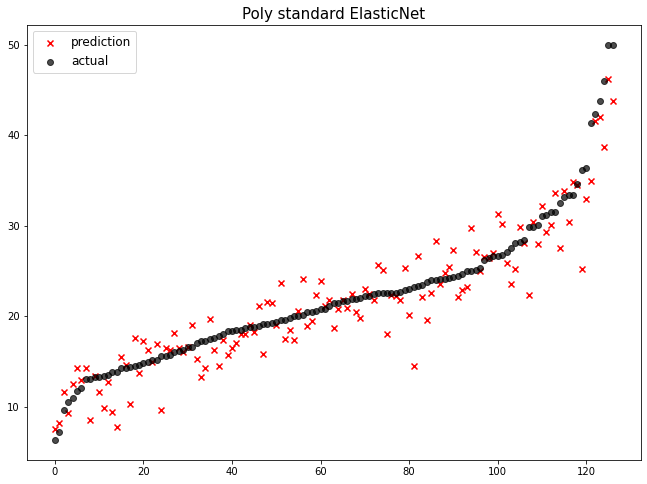

                       model        mse
0           Lasso(alpha=100)  48.725206
1          MinMax ElasticNet  27.308733
2        Standard ElasticNet  27.308733
3            Lasso(alpha=10)  27.146245
4             Lasso(alpha=1)  19.882302
5           Ridge(alpha=100)  18.018382
6           Lasso(alpha=0.1)  17.083615
7            Ridge(alpha=10)  17.068408
8   ElasticNet(l1_ratio=0.2)  16.914638
9   ElasticNet(l1_ratio=0.5)  16.822431
10            Ridge(alpha=1)  16.652412
11  ElasticNet(l1_ratio=0.8)  16.638817
12          LinearRegression  16.485165
13       Ridge(alpha=0.0001)  16.485151
14        Ridge(alpha=0.001)  16.485020
15       Lasso(alpha=0.0001)  16.484261
16         Ridge(alpha=0.01)  16.483801
17          Ridge(alpha=0.1)  16.479483
18        Lasso(alpha=0.001)  16.476551
19         Lasso(alpha=0.01)  16.441822
20           Poly ElasticNet  10.147479
21  Poly standard ElasticNet   8.264002


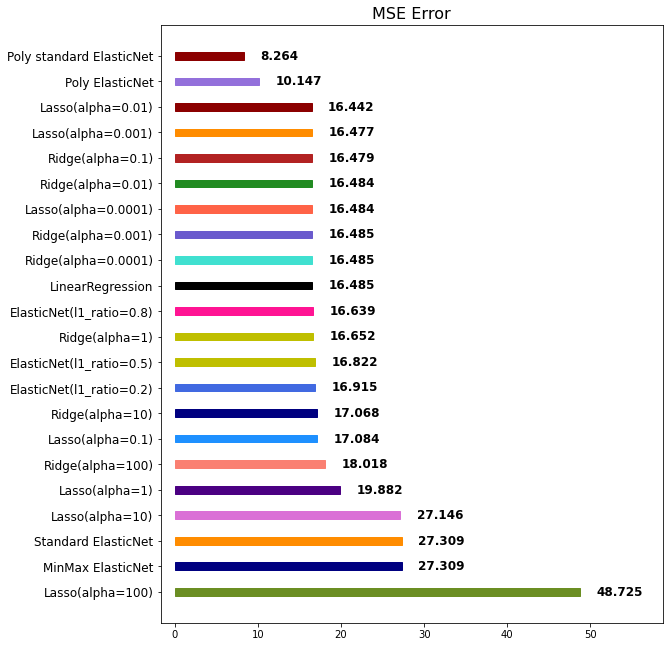

In [149]:
mse_eval('Poly standard ElasticNet', poly_pred, y_test)